In [ ]:
import nltk 

In [2]:
nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------


Downloader>  d



Download which package (l=list; x=cancel)?


  Identifier>  stopwords


      Package stopwords is already up-to-date!



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------


Downloader>  



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------


Downloader>  1


Command '1' unrecognized

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------


Downloader>  q


# load the dataset

**first, let's see what is inside the data

In [2]:
msg = [line.rstrip() for line in open('smsspamcollection/SMSSpamCollection')]

In [5]:
msg[0]

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [6]:
len(msg)

5574

In [9]:
for i, mess in enumerate(msg[:10]):
    print(i, mess)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code 

**Now, let's put this msgs into a panda dataframe 

In [10]:
import pandas as pd

In [12]:
msg_df=pd.read_csv('smsspamcollection/SMSSpamCollection', sep='\t', names=['Label', 'Msgs'])

In [13]:
msg_df.head()

,Label,Msgs
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [24]:
print(msg_df['Msgs'][9])

Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030


In [25]:
msg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   5572 non-null   object
 1   Msgs    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [26]:
msg_df.describe()

,Label,Msgs
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [27]:
msg_df.groupby('Label').describe()

Msgs                                                               
      count unique                                                top freq
Label                                                                     
ham    4825   4516                             Sorry, I'll call later   30
spam    747    653  Please call our customer service representativ...    4

In [28]:
msg_df['Length'] = msg_df['Msgs'].apply(len)

In [30]:
msg_df.head()

,Label,Msgs,Length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


# Data visualization

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

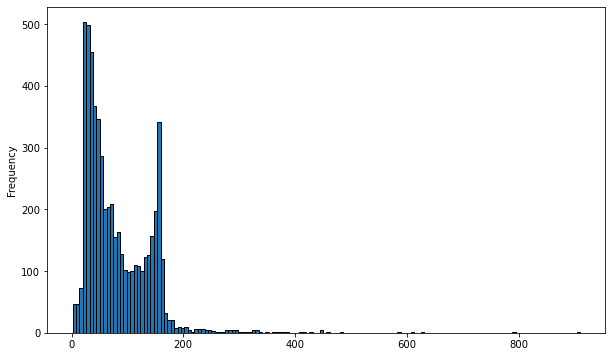

In [43]:
msg_df['Length'].plot.hist(edgecolor='black',bins=150, figsize=(10,6)); 

In [44]:
msg_df['Length'].describe() # the longest msg is 910 in length

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: Length, dtype: float64

In [62]:
msg_df[msg_df['Length']==910]['Msgs'].iloc[0] # check the longest msg

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

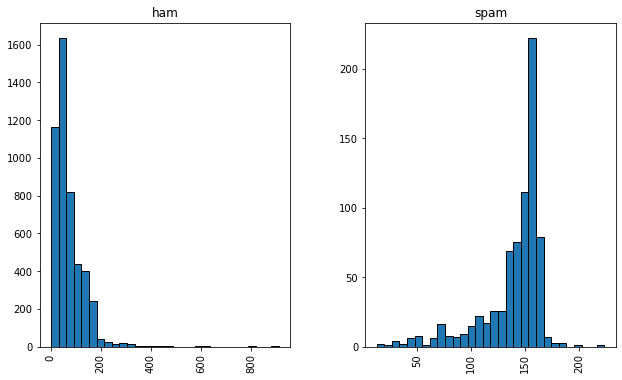

In [70]:
msg_df.hist(column='Length', by='Label', figsize=(10,6), bins=30, edgecolor='black'); # it seems like the spam msgs tend to be longer

# Text tokenization

In [84]:
import string
from nltk.corpus import stopwords

In [85]:
# a simple example

In [99]:
ex = 'Notice: this is a simple example !!'

In [100]:
ex_without_punc = [i for i in ex if i not in string.punctuation]

In [101]:
ex_without_punc

['N',
 'o',
 't',
 'i',
 'c',
 'e',
 ' ',
 't',
 'h',
 'i',
 's',
 ' ',
 'i',
 's',
 ' ',
 'a',
 ' ',
 's',
 'i',
 'm',
 'p',
 'l',
 'e',
 ' ',
 'e',
 'x',
 'a',
 'm',
 'p',
 'l',
 'e',
 ' ']

In [102]:
ex_without_punc = ''.join(ex_without_punc)

In [103]:
ex_without_punc

'Notice this is a simple example '

In [104]:
ex_without_punc.split()

['Notice', 'this', 'is', 'a', 'simple', 'example']

In [117]:
clean_ex = [i for i in ex_without_punc.split() if i.lower() not in stopwords.words('english')]

In [118]:
clean_ex

['Notice', 'simple', 'example']

In [119]:
# now let's define a function to cover all the process above

In [127]:
def msg_tokenizer(msg):
    without_punc = [i for i in msg if i not in string.punctuation]
    text_without_punc = ''.join(without_punc)
    clean_msg =  [i for i in text_without_punc.split() if i.lower() not in stopwords.words('english')]
    return clean_msg

In [128]:
msg_tokenizer(ex) # it works well 

['Notice', 'simple', 'example']

In [131]:
msg_df['Msgs'].head(5).apply(msg_tokenizer)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: Msgs, dtype: object

# Count Vectorization 

In [133]:
from sklearn.feature_extraction.text import CountVectorizer

In [134]:
msg_transformer = CountVectorizer(analyzer=msg_tokenizer).fit(msg_df['Msgs'])

In [137]:
print(len(msg_transformer.vocabulary_)) 

11425


In [138]:
# let's look at a transfromed msg, see how it looks like

In [141]:
msg5 = msg_df['Msgs'][5]
print(msg5)

FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv


In [151]:
transformed_msg5 = msg_transformer.transform([msg5]) # remember to make msg5 in a list
print(transformed_msg5, '\t',transformed_msg5.shape)

  (0, 543)	1
  (0, 1943)	1
  (0, 2222)	1
  (0, 2346)	1
  (0, 3930)	1
  (0, 4379)	1
  (0, 4893)	1
  (0, 5467)	1
  (0, 5864)	1
  (0, 6755)	1
  (0, 7800)	1
  (0, 8567)	1
  (0, 9209)	1
  (0, 9641)	1
  (0, 10073)	1
  (0, 10093)	1
  (0, 11011)	1
  (0, 11150)	1
  (0, 11371)	1 	 (1, 11425)


In [154]:
msg_transformer.get_feature_names()[1943] # check specific word

'FreeMsg'

In [165]:
transformed_msg = msg_transformer.transform(msg_df['Msgs']) # transform our msg data

In [160]:
print(f'the shape of the sparse matrix: {transformed_msg.shape} \n')
print(f'the amount of non-zero occurances: {transformed_msg.nnz} \n')

the shape of the sparse matrix: (5572, 11425) 

the amount of non-zero occurances: 50548 



# Tfidf-Vectorization

In [163]:
from sklearn.feature_extraction.text import TfidfTransformer

In [164]:
tfidf_transformer = TfidfTransformer().fit(transformed_msg)

In [167]:
print(tfidf_transformer.transform(transformed_msg5)) # let's see how this works using the msg5 as a example

  (0, 11371)	0.21562498424494592
  (0, 11150)	0.20797972406541168
  (0, 11011)	0.22715306908991975
  (0, 10093)	0.1612251876427042
  (0, 10073)	0.2509014163169898
  (0, 9641)	0.15811922187430408
  (0, 9209)	0.29215147836872296
  (0, 8567)	0.16663191124045565
  (0, 7800)	0.1451533754697944
  (0, 6755)	0.2132611765079785
  (0, 5864)	0.2746497635440599
  (0, 5467)	0.3060433709506642
  (0, 4893)	0.1612251876427042
  (0, 4379)	0.29215147836872296
  (0, 3930)	0.3060433709506642
  (0, 2346)	0.2509014163169898
  (0, 2222)	0.1730546963330754
  (0, 1943)	0.2509014163169898
  (0, 543)	0.18730163481531384


In [172]:
msg_transformer.vocabulary_['love']

7913

In [176]:
tfidf_transformer.idf_[msg_transformer.vocabulary_['love']] # Inverse document frequency of a perticular word

4.773658523649919

In [178]:
transformed_tfidf_msg = tfidf_transformer.transform(transformed_msg)

# Using a classifier to predict the label of a msg

In [177]:
from sklearn.naive_bayes import MultinomialNB

In [180]:
spam_detective = MultinomialNB().fit(transformed_tfidf_msg, msg_df['Label'])

In [182]:
spam_detective.predict(tfidf_transformer.transform(transformed_msg5))[0] 

'ham'

In [186]:
msg_df['Label'][5] # seems like we predict wrong

'spam'

In [194]:
all_pred = spam_detective.predict(transformed_tfidf_msg)
print(all_pred)

['ham' 'ham' 'spam' ... 'ham' 'ham' 'ham']


### now let's build a pipe line to test the model

In [211]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [197]:
Xtrain, Xtest, ytrain, ytest = train_test_split(msg_df['Msgs'], msg_df['Label'])

In [200]:
pipe = Pipeline([('count', CountVectorizer(analyzer=msg_tokenizer)),('tfidf', TfidfTransformer()),('clf', MultinomialNB())])

In [201]:
pipe.fit(Xtrain,ytrain)

Pipeline(steps=[('count',
                 CountVectorizer(analyzer=<function msg_tokenizer at 0x7fe7254acaf0>)),
                ('tfidf', TfidfTransformer()), ('clf', MultinomialNB())])

In [207]:
pipe.named_steps

{'count': CountVectorizer(analyzer=<function msg_tokenizer at 0x7fe7254acaf0>),
 'tfidf': TfidfTransformer(),
 'clf': MultinomialNB()}

In [209]:
predictions = pipe.predict(Xtest)

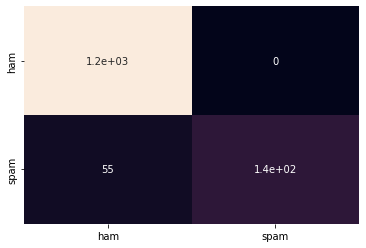

In [222]:
sns.heatmap(confusion_matrix(ytest, predictions), xticklabels=msg_df['Label'].unique(), yticklabels=ytest.unique(), annot=True, cbar=False);

In [225]:
print(classification_report(ytest, predictions)) # overall the model performs very well

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1197
        spam       1.00      0.72      0.84       196

    accuracy                           0.96      1393
   macro avg       0.98      0.86      0.91      1393
weighted avg       0.96      0.96      0.96      1393

